In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fire-area/forestfires.csv
/kaggle/input/forest-fire-area/forestfires.csv


In [87]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [88]:
#importing dataset
dataset = pd.read_csv("/kaggle/input/forest-fire-area/forestfires.csv")
dataset.head()
#converting dataset to dataframe
df = pd.DataFrame(dataset)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [90]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [91]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [92]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [93]:
df.loc[:258,'Region']=1  #assigning record from 1 to 257 as region 1
df.loc[258:,'Region']=2    #assigning records after 257 as region 2
df[['Region']] = df[['Region']].astype(int)

In [94]:
df.isnull().sum() 

X         0
Y         0
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp      0
RH        0
wind      0
rain      0
area      0
Region    0
dtype: int64

In [95]:
#removes any row that has at least one missing value
df =df.dropna().reset_index(drop=True) 
#return no.of rows and column in dataframe 
df.shape  

(517, 14)

In [96]:
#returns a DataFrame containing only the row with index 258
df.iloc[[258]]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Region
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.0,2


In [97]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'Region'],
      dtype='object')

In [98]:
#access column names and removes leading and trailing whitespace from the string.
df.columns = df.columns.str.strip()
df.columns 

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'Region'],
      dtype='object')

In [99]:
df[:258]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Region
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,7,4,aug,thu,91.9,109.2,565.5,8.0,21.4,38,2.7,0.0,1.52,1
254,6,3,aug,thu,91.6,138.1,621.7,6.3,18.9,41,3.1,0.0,10.34,1
255,2,5,aug,thu,87.5,77.0,694.8,5.0,22.3,46,4.0,0.0,0.00,1
256,8,6,aug,sat,94.2,117.2,581.1,11.0,23.9,41,2.2,0.0,8.02,1


In [100]:
df[258:]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Region
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00,2
259,7,4,aug,sat,91.8,170.9,692.3,13.7,23.7,40,1.8,0.0,1.38,2
260,2,4,aug,mon,93.6,97.9,542.0,14.4,28.3,32,4.0,0.0,8.85,2
261,3,4,aug,fri,91.6,112.4,573.0,8.9,11.2,84,7.6,0.0,3.30,2
262,2,4,aug,fri,91.6,112.4,573.0,8.9,21.4,42,3.1,0.0,4.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,2
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,2


In [102]:
#Drops the specified columns 
df1 = df.drop(['X','Y','day','month'], axis=1)

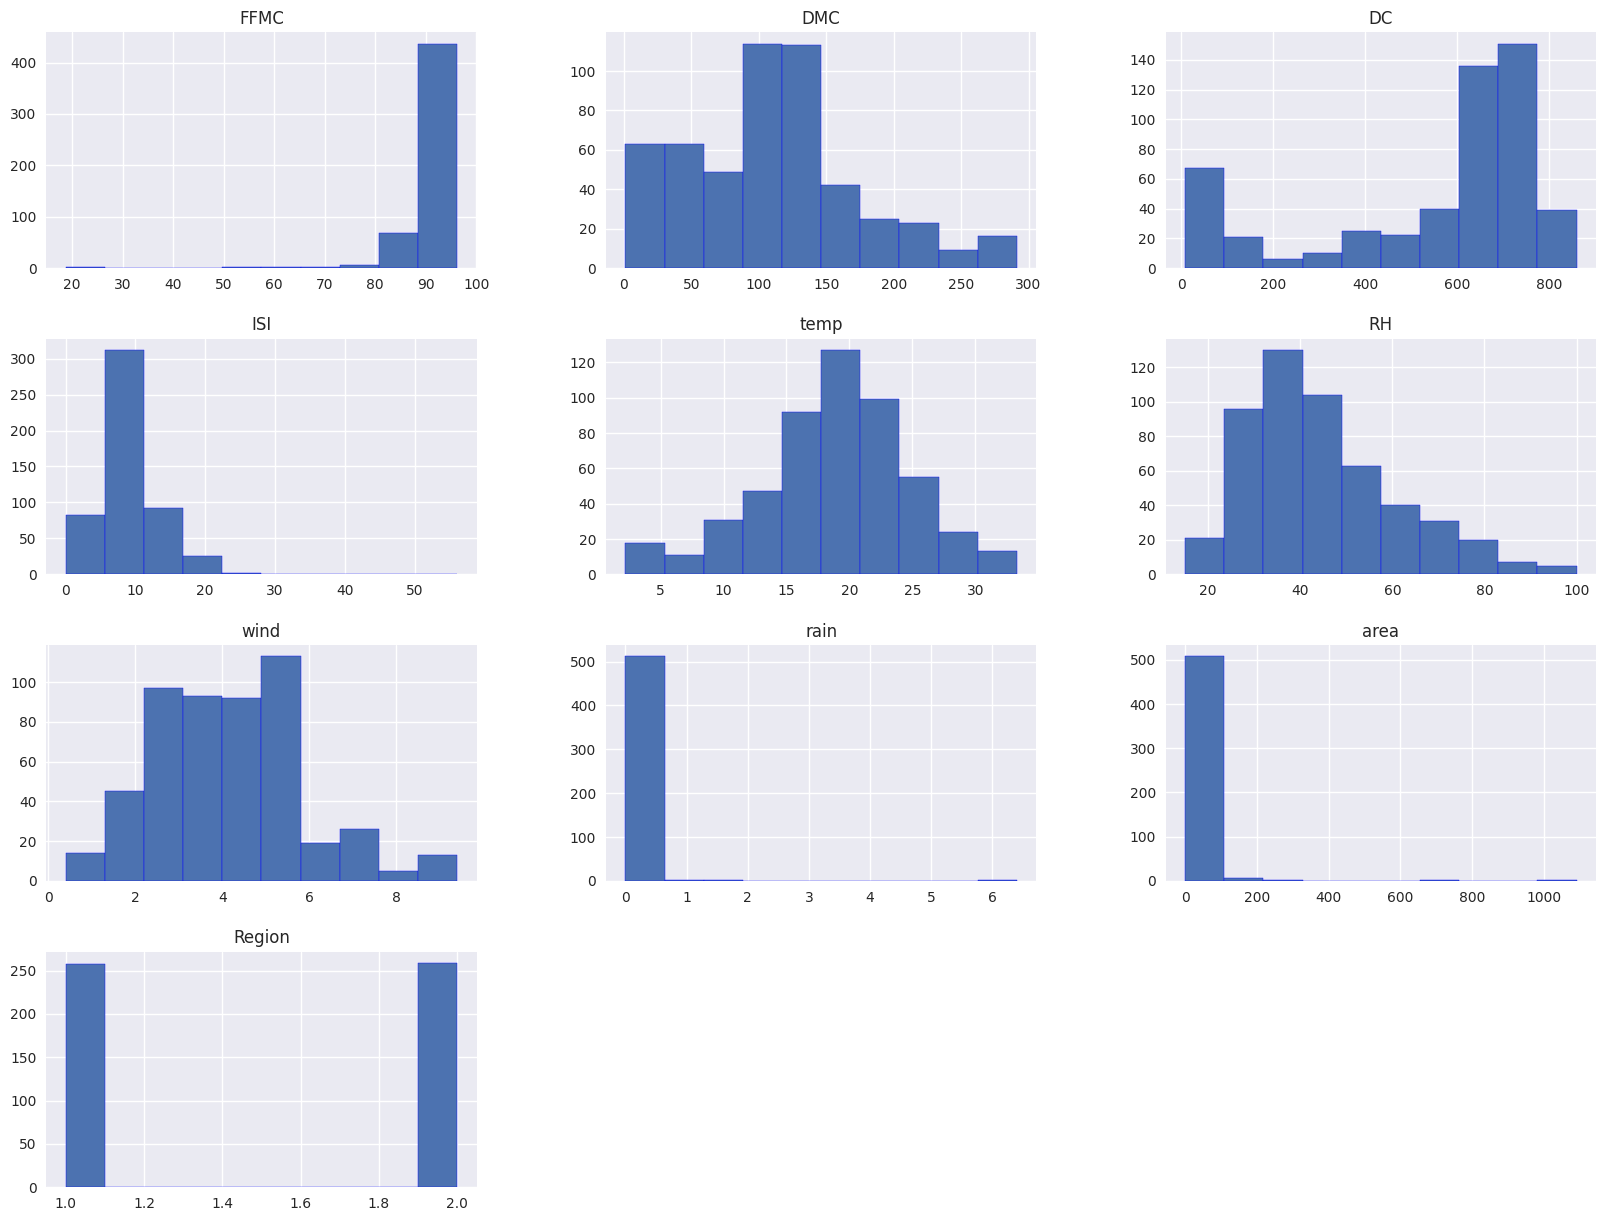

In [103]:
# utilizes the matplotlib library to create the histograms taking different factors 
plt.style.use('seaborn')
df1.hist( figsize=(20,15), ec = 'b')
plt.show()

In [104]:
#no. of records where area burnt is zero
list(df['area']).count(0)

247

Text(0, 0.5, 'area')

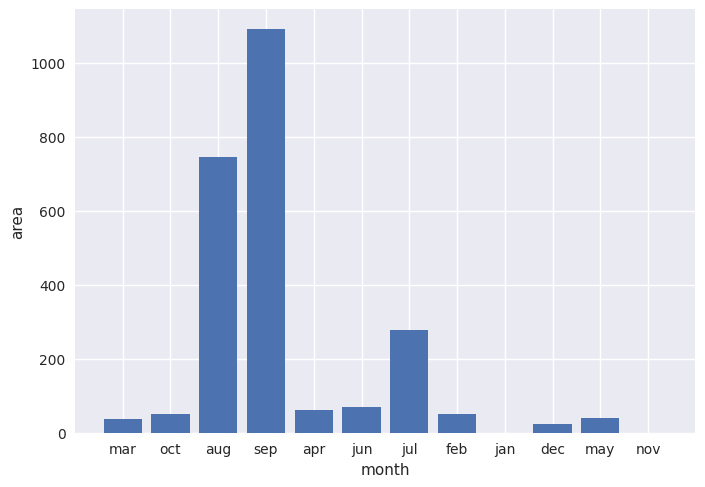

In [106]:
#uses matplotlib to create a bar plot using the values from the 'month' column as the x-axis and the values from the 'area' column as the y-axis
plt.bar(list(df['month']),list(df['area']))
plt.xlabel("month")
plt.ylabel("area")
#From the graph we can get to know in which month more area is burnt by forest fire. 
#This could further tell in which month there are maximum chances of forest fire so that the preacations could be taken beforehand.


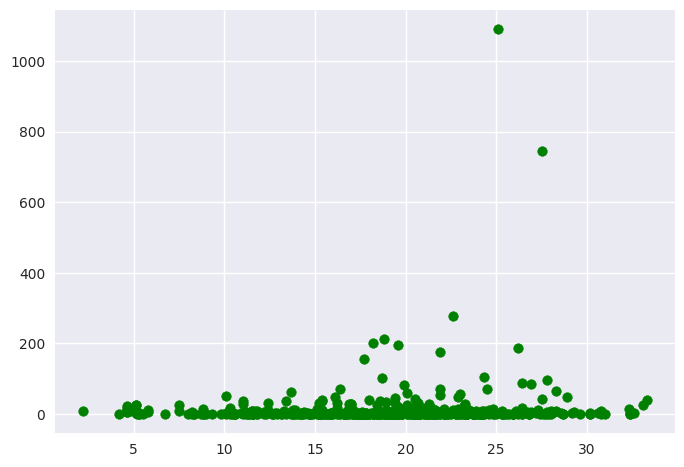

In [107]:
# creates a scatter plot using the values from the 'temp' column as the x-axis and the values from the 'area' column as the y-axis. 
plt.scatter(x=df['temp'],y=df['area'],color='green')

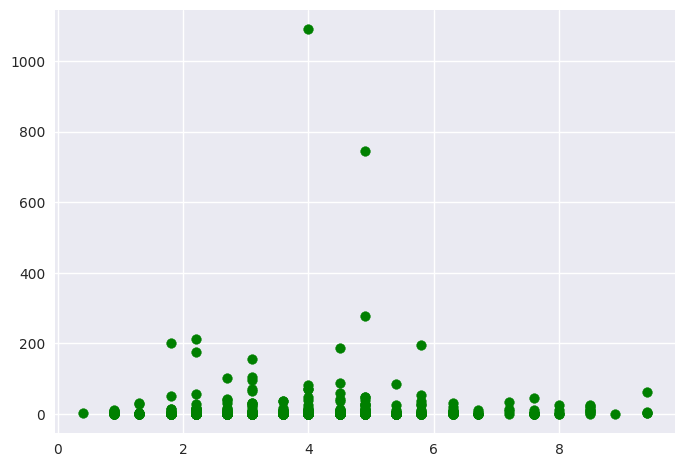

In [108]:
#creates a scatter plot using the values from the 'wind' column as the x-axis and the values from the 'area' column as the y-axis.
plt.scatter(x=df['wind'],y=df['area'],color='green')

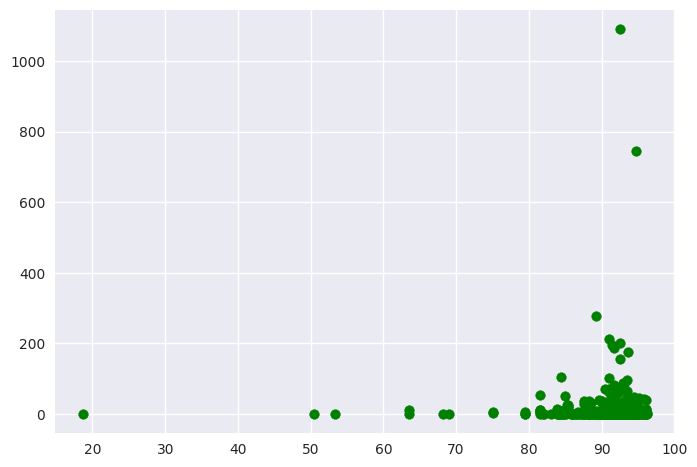

In [110]:
# creates a scatter plot using the values from the 'ffmc' column as the x-axis and the values from the 'area' column as the y-axis
plt.scatter(x=df['FFMC'],y=df['area'],color='green')

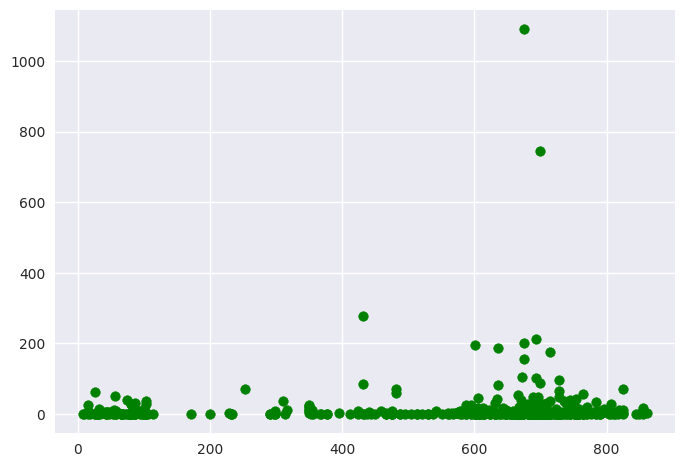

In [112]:
#creates a scatter plot using the values from the 'dc' column as the x-axis and the values from the 'area' column as the y-axis
plt.scatter(x=df['DC'],y=df['area'],color='green')

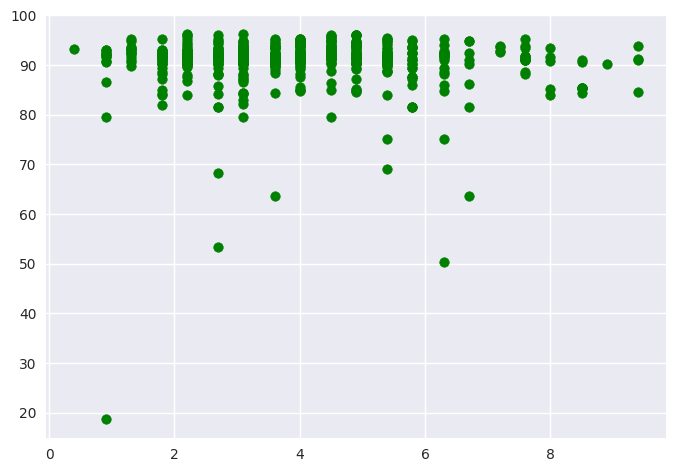

In [113]:
# creates a scatter plot using the values from the 'wind' column as the x-axis and the values from the 'ffmc' column as the y-axis
plt.scatter(x=df['wind'],y=df['FFMC'],color='green')

In [114]:
#normalizing the 'wind' and 'ffmc' columns
from sklearn.preprocessing import PolynomialFeatures
normalized_wind=df['wind']/df['wind'].max()
normalized_ffmc=df['FFMC']/df['FFMC'].max()
new_data =np.array(pd.concat([normalized_wind,normalized_ffmc],axis=1))
area=np.array(df['area']);
new_data*=10   #so the new data lies between the range of 0 to 10
new_data

array([[7.12765957, 8.96049896],
       [0.95744681, 9.41787942],
       [1.38297872, 9.41787942],
       ...,
       [7.12765957, 8.48232848],
       [4.25531915, 9.81288981],
       [4.78723404, 8.26403326]])

In [116]:
#split the data into training and testing sets.
from sklearn.model_selection import train_test_split
# 80% data taken for training ans 20% for testing.
x_train,x_test,y_train,y_test=train_test_split(new_data,area,train_size=0.8)

In [117]:
poly=PolynomialFeatures(degree=3)
polu_features=poly.fit_transform(new_data)
x_train,x_test,y_train,y_test=train_test_split(new_data,area,train_size=0.9)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
#linear regression model is being created and fitted to the training data.
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [121]:
y_pred=model.predict(x_test)
y_pred

array([14.98690931, 12.09079538, 12.98207778, 13.1516146 , 18.14278932,
       14.74584869, 16.25247759, 11.37286165, 16.78589245,  9.25460964,
       13.41476712, 14.13794899, 18.2322562 , 17.21672009, 13.05317618,
        5.18950416, 16.46433649, 11.22312961, 12.69869508, 10.98393069,
       11.18681804, 17.18565666, 10.18778871, -3.934488  , 11.67604913,
       17.27512354, 12.21657383, 12.33185601,  6.75639822, 14.34422278,
       12.97081914, 11.63973756, 15.33952871,  8.14249681, 10.0709818 ,
       10.64443164, 13.63187415, 14.40821134, 15.89088665, 17.59143137,
        4.92262825,  7.15616242, 15.10743963, 12.24577556, 13.99346509,
       16.52273994, 18.64700245, 15.34325211, 12.27159085, 12.87051901,
       12.66949336, 11.13366273])

In [122]:
from sklearn .metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

18.97899807119234

In [123]:
import pickle
pickle.dump(model,open("model.sav",'wb'))

In [124]:
loaded=pickle.load(open("/kaggle/working/model.sav",'rb'))
load_pred=loaded.predict(x_test)
mean_absolute_error(y_test,load_pred)

18.97899807119234